# **Pandas Merge Analysis of Student Enrollments and Course Revenues**


In [1]:
import pandas as pd
import numpy as np

In [2]:
# import some Dataset
courses = pd.read_csv('Data\Day37\courses.csv')


dec = pd.read_csv('Data\Day37\Dec.csv')
matches = pd.read_csv('Data\Day37\matches.csv')
delivery = pd.read_csv('Data\Day37\deliveries.csv')

In [3]:
students = pd.read_csv('Data\Day37\student.csv')


In [4]:
nov = pd.read_csv('Nov.csv')

## **1. find total revenue generated**

In [18]:
regs = pd.concat([nov,dec],ignore_index=True)
regs.head()

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9


In [7]:
total = regs.merge(courses,how='inner',on='course_id')['price'].sum()
total

154247

## **2. find month by month revenue**


In [8]:
temp_df = pd.concat([nov,dec],keys=['Nov','Dec']).reset_index()
temp_df.merge(courses,on='course_id').groupby('level_0')['price'].sum()

level_0
Dec    65072
Nov    89175
Name: price, dtype: int64

## **3. Print the registration table**

In [9]:
regs.merge(students,on='student_id').merge(courses,on='course_id')[['name','course_name','price']]

,name,course_name,price
0,Chhavi Lachman,python,2499
1,Preet Sha,python,2499
2,Fardeen Mahabir,python,2499
3,Kailash Harjo,python,2499
4,Seema Kota,python,2499
5,Shashank D’Alia,python,2499
6,Radha Dutt,python,2499
7,Pranab Natarajan,python,2499
8,Chhavi Lachman,machine learning,9999
9,Qabeel Raman,machine learning,9999


## **4. Plot bar chart for revenue/course**

<Axes: xlabel='course_name'>

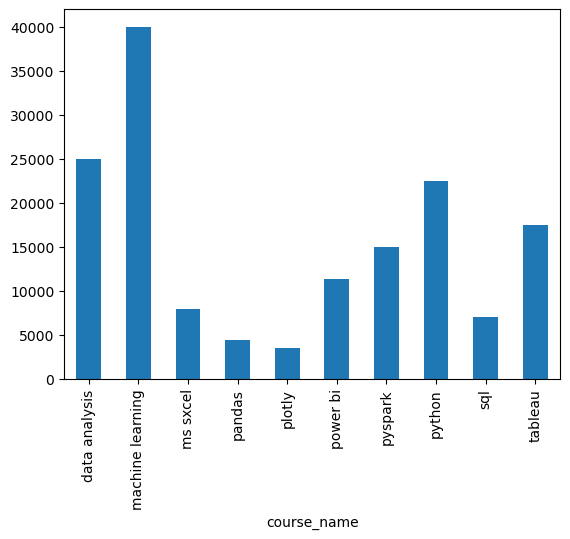

In [10]:
regs.merge(courses,on='course_id').groupby('course_name')['price'].sum().plot(kind='bar')

## **5. find students who enrolled in both the months**

In [11]:
common_student_id = np.intersect1d(nov['student_id'],dec['student_id'])
common_student_id

array([ 1,  3,  7, 11, 16, 17, 18, 22, 23], dtype=int64)

In [12]:
students[students['student_id'].isin(common_student_id)]


,student_id,name,partner
0,1,Kailash Harjo,23
2,3,Parveen Bhalla,3
6,7,Tarun Thaker,9
10,11,David Mukhopadhyay,20
15,16,Elias Dodiya,25
16,17,Yasmin Palan,7
17,18,Fardeen Mahabir,13
21,22,Yash Sethi,21
22,23,Chhavi Lachman,18


## **6. find course that got no enrollment**

In [13]:
course_id_list = np.setdiff1d(courses['course_id'],regs['course_id'])
courses[courses['course_id'].isin(course_id_list)]

,course_id,course_name,price
10,11,Numpy,699
11,12,C++,1299


## **7. find students who did not enroll into any courses**

In [14]:
student_id_list = np.setdiff1d(students['student_id'],regs['student_id'])
students[students['student_id'].isin(student_id_list)].shape[0]

(10/28)*100

35.714285714285715

## **8. Print student name -> partner name for all enrolled students**

In [15]:
students.merge(students,how='inner',left_on='partner',right_on='student_id')[['name_x','name_y']]

,name_x,name_y
0,Kailash Harjo,Chhavi Lachman
1,Esha Butala,Kailash Harjo
2,Parveen Bhalla,Parveen Bhalla
3,Marlo Dugal,Pranab Natarajan
4,Kusum Bahri,Lakshmi Contractor
5,Lakshmi Contractor,Aayushman Sant
6,Tarun Thaker,Nitika Chatterjee
7,Radheshyam Dey,Kusum Bahri
8,Nitika Chatterjee,Marlo Dugal
9,Aayushman Sant,Radheshyam Dey


## **9. find top 3 students who did most number enrollments**

In [16]:
regs.merge(students,on='student_id').groupby(['student_id','name'])['name'].count().sort_values(ascending=False).head(3)

student_id  name          
23          Chhavi Lachman    6
7           Tarun Thaker      5
1           Kailash Harjo     4
Name: name, dtype: int64

## **10. find top 3 students who spent most amount of money on courses**

In [17]:
regs.merge(students,on='student_id').merge(courses,on='course_id').groupby(['student_id','name'])['price'].sum().sort_values(ascending=False).head(3)

student_id  name            
23          Chhavi Lachman      22594
14          Pranab Natarajan    15096
19          Qabeel Raman        13498
Name: price, dtype: int64